In [26]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [27]:
batch_size = 32
img_height = 180
img_width = 180

In [28]:
data_dir = "G:/My Drive/Water Bodies Datasets"

In [29]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 190 files belonging to 3 classes.


Using 152 files for training.


In [30]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 190 files belonging to 3 classes.
Using 38 files for validation.


In [31]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.01,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 190 files belonging to 3 classes.
Using 189 files for training.


In [32]:
class_names = train_ds.class_names
print(class_names)

['mud water', 'oil water', 'pure water']


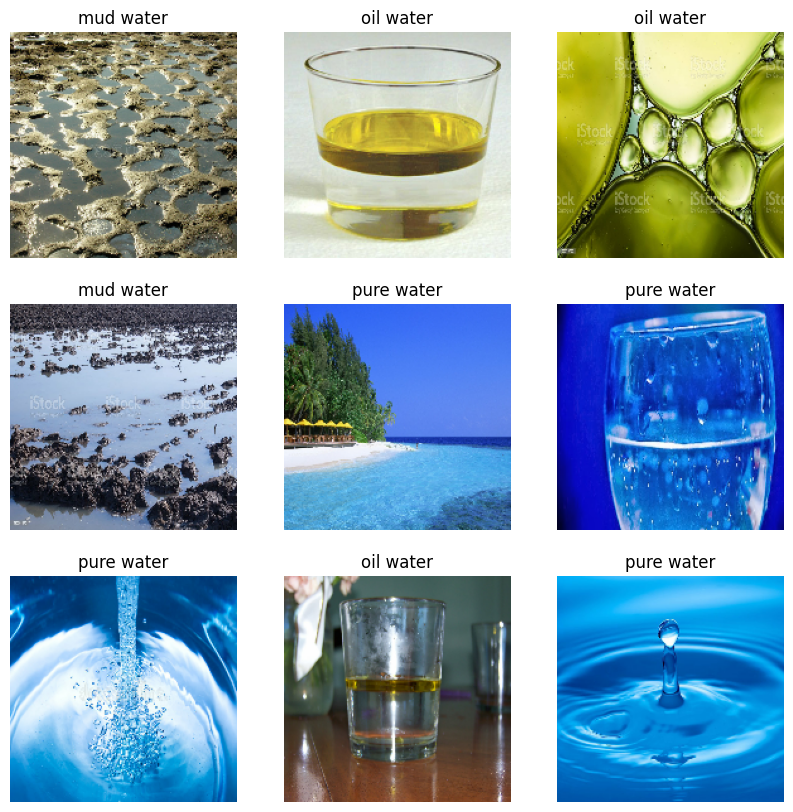

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [34]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [35]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [36]:
normalization_layer = layers.Rescaling(1./255)

In [37]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.022745887 0.88278717


In [38]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

In [41]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


5/5 [==============================] - 4s 546ms/step - loss: 2.3427 - accuracy: 0.3750 - val_loss: 1.4242 - val_accuracy: 0.3158
Epoch 2/50
5/5 [==============================] - 2s 418ms/step - loss: 0.9318 - accuracy: 0.5987 - val_loss: 0.8407 - val_accuracy: 0.5789
Epoch 3/50
5/5 [==============================] - 2s 415ms/step - loss: 0.8277 - accuracy: 0.5526 - val_loss: 0.8028 - val_accuracy: 0.6053
Epoch 4/50
5/5 [==============================] - 2s 464ms/step - loss: 0.6822 - accuracy: 0.7500 - val_loss: 0.6486 - val_accuracy: 0.7105
Epoch 5/50
5/5 [==============================] - 2s 455ms/step - loss: 0.5531 - accuracy: 0.7895 - val_loss: 0.6177 - val_accuracy: 0.7895
Epoch 6/50
5/5 [==============================] - 2s 420ms/step - loss: 0.4756 - accuracy: 0.8026 - val_loss: 0.6600 - val_accuracy: 0.6842
Epoch 7/50
5/5 [==============================] - 2s 428ms/step - loss: 0.4324 - accuracy: 0.8487 - val_loss: 0.8063 - val_accuracy: 0.6842
Epoch 8/50
5/5 [===============

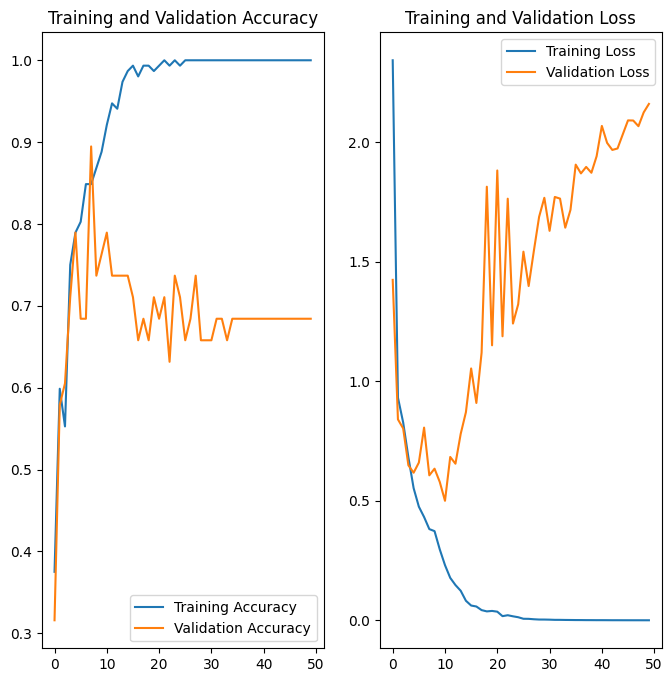

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [43]:
predict_path = "G:/My Drive/Water Bodies Datasets/oil water/Image_34.jpg"

img = tf.keras.utils.load_img(
    predict_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 176ms/step
This image most likely belongs to oil water with a 99.92 percent confidence.


In [44]:
test_loss, test_acc = model.evaluate(test_ds, verbose=2)

6/6 - 4s - loss: 0.4337 - accuracy: 0.9365 - 4s/epoch - 610ms/step


In [45]:
test_acc

0.9365079402923584

In [46]:
model.save('path_to_saved_model')

INFO:tensorflow:Assets written to: path_to_saved_model\assets


INFO:tensorflow:Assets written to: path_to_saved_model\assets
